In [22]:
import pandas as pd 
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from openpyxl import load_workbook
import csv

#Loading the dataset

In [23]:
sm_df = pd.read_csv("./training_set.csv")

In [24]:
sm_df.shape

(100000, 4)

#Print the first 5 rows of the dataframe to check the content of the dataset

In [25]:
sm_df.head()

,id,income,age,friends_list
0,249893612,38083.0,44.8677,"4202980087,2258284167,4614845762,233604503,650..."
1,2264281529,29429.0,30.2327,"26600353,47515927,20896265,23449295,501162087,..."
2,555636171,111127.0,29.5693,"5540122414,4285863106,3061861070,2977843626,14..."
3,3976714904,62514.0,37.8036,"791994715,1991840134,3317519232,35655282,27074..."
4,1773172946,46892.0,34.6590,"6089602574,6038882552,5681654631,1591004024,42..."


#Basic statistic details about the data

In [26]:
sm_df.describe()

,id,income,age
count,1.000000e+05,100000.000000,100000.000000
mean,9.387667e+08,59501.578690,34.508510
std,1.021930e+09,37263.852762,11.336781
min,5.090000e+02,4755.000000,15.110520
25%,2.078216e+08,34774.750000,26.475600
50%,4.442616e+08,50659.000000,31.319750
75%,1.508312e+09,67150.250000,39.047600
max,1.650528e+10,177306.000000,80.000000


#Information about the data types, columns, null value counts etc

In [27]:
sm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            100000 non-null  int64  
 1   income        100000 non-null  float64
 2   age           100000 non-null  float64
 3   friends_list  100000 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ MB


#Show the count of Nans

In [30]:
print(sm_df.isnull().sum(axis=0))

id              0
income          0
age             0
friends_list    0
dtype: int64


#There is no Null value in the dataset which is good, but still would be good to know the Distribution of the income and age

In [ ]:
P = sm_df.hist(figsize = (200,200)

In [32]:
print(sm_df.shape)

(100000, 4)


#Besides friend list, check if age matters the income

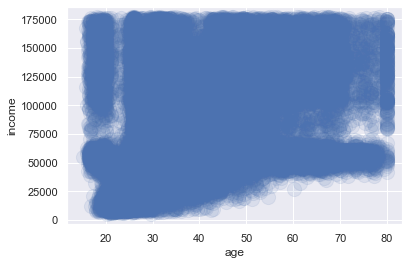

In [33]:
age_inc = cluster.KMeans(n_clusters=10,random_state=10)
age_inc.fit(sm_df[['age','income']])
sm_df['cluaster']=age_inc.labels_
plt.scatter(x='age',y='income',data=sm_df,s=200,alpha=0.1,label=cluster)
plt.xlabel('age')
plt.ylabel('income')
plt.show()

#Apparently, the elder users are, the higher the minimum income is. So, age does matter the minimum income.

In [34]:
sm_df['avg_income'] = ''
sm_df.head()

,id,income,age,friends_list,cluaster,avg_income
0,249893612,38083.0,44.8677,"4202980087,2258284167,4614845762,233604503,650...",0,
1,2264281529,29429.0,30.2327,"26600353,47515927,20896265,23449295,501162087,...",7,
2,555636171,111127.0,29.5693,"5540122414,4285863106,3061861070,2977843626,14...",8,
3,3976714904,62514.0,37.8036,"791994715,1991840134,3317519232,35655282,27074...",9,
4,1773172946,46892.0,34.6590,"6089602574,6038882552,5681654631,1591004024,42...",6,


In [40]:
data = sm_df.values
# print(data)
ids = list(data[:,0])
# print(ids)
fri_lists = data[:,3]
# print(fri_lists)
avg_income = []

In [ ]:
for i, fri_list in zip(range(len(fri_lists)), fri_lists):
    fri_list = fri_list.split(',')
    if '#' in fri_list[0]:
        continue
    income = 0
    count = 0
    for fri_id in fri_list:
        if int(fri_id) in ids:
            ids_index = ids.index(int(fri_id))
            income += data[ids_index,1]
            count += 1
    if count != 0:
        income /= count

    data[i,4] = income
data = data [:, [0,1,2,4]]
sm_df = pd.DataFrame(data, columns=['id', 'income', 'age', 'avg_income'])
sm_df.head()

In [ ]:
sm_df = sm_df.astype('int64')
print(sm_df3.info())

In [ ]:
y = sm_df['income']
X = sm_df.iloc[:,2:]
print(X.head())

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)
print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

In [ ]:
test_df = pd.read_csv("./idstest.csv")
print(test_df.info())

In [ ]:
test_df['avg_income'] = ''
test_df.head()

In [ ]:
data1 = test_df.values
ids1 = list(data1[:,0])
fri_lists1 = data1[:,3]
avg_income = []
for i, fri_list in zip(range(len(fri_lists1)), fri_lists1):
    fri_list = fri_list.split(',')
    if '#' in fri_list[0]:
        continue
    income = 0
    count = 0
    for fri_id in fri_list:
        if int(fri_id) in ids1:
            ids_index = ids1.index(int(fri_id))
            income += data1[ids_index,1]
            count += 1
    if count != 0:
        income /= count

    data1[i,4] = income
data1 = data1 [:, [0,1,2,4]]
test_df = pd.DataFrame(data1, columns=['id', 'income', 'age', 'avg_income'])
print(test_df.head)

In [ ]:
data3 = test_df.values
x_pre = data3[:,[2,3]]
model.fit(X,y)
y_pre = knn.predict(X_pre)
test_df['income']=y_pre
test_df.to_csv(r"/Users/yecuiling/Desktop/test_pre.csv", mode='a',index=False)
print(test_df.values)